<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/US_arrest_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score,silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage,dendrogram

In [28]:
df=pd.read_csv('/content/drive/MyDrive/USArrests.csv')

In [29]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [30]:
df.rename({'Unnamed: 0':'State'},axis='columns',inplace=True)

In [31]:
df.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [33]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [35]:
df['Murder']=round(df['Murder'],0).astype(int)
df['Rape']=round(df['Rape'],0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     50 non-null     object
 1   Murder    50 non-null     int64 
 2   Assault   50 non-null     int64 
 3   UrbanPop  50 non-null     int64 
 4   Rape      50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


<Figure size 432x432 with 0 Axes>

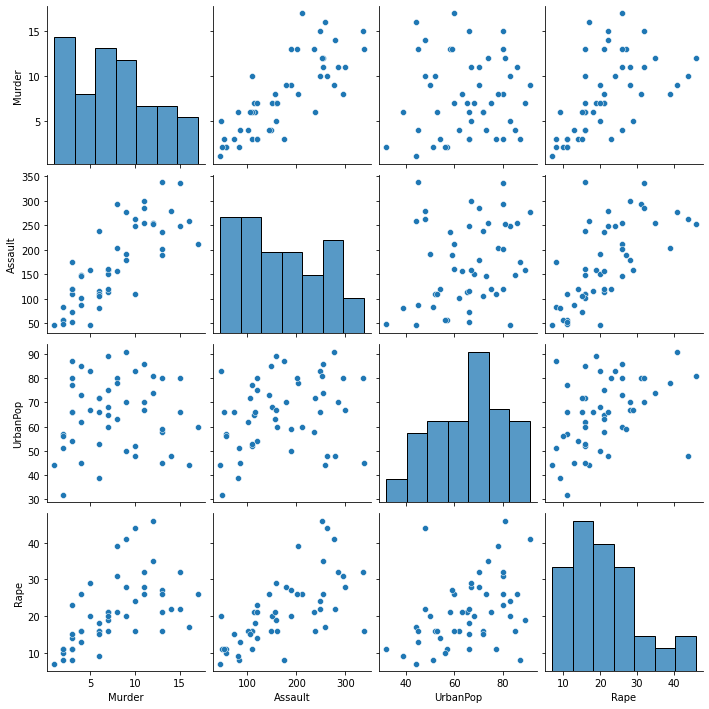

In [45]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df)
plt.show()

We can see corelation with murder and assualt, murder and rape, assault and rape. We can also see there is nothing much related to urban population in relation to crime

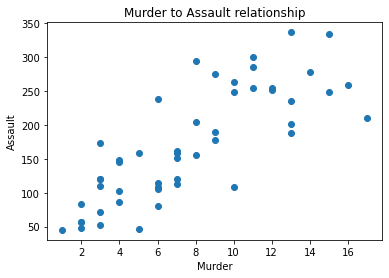

In [54]:
plt.figure(figsize=(6,4))
plt.scatter(df['Murder'],df['Assault'])
plt.title('Murder to Assault relationship')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

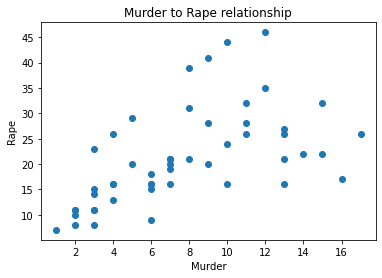

In [55]:
plt.figure(figsize=(6,4))
plt.scatter(df['Murder'],df['Rape'])
plt.title('Murder to Rape relationship')
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.show()

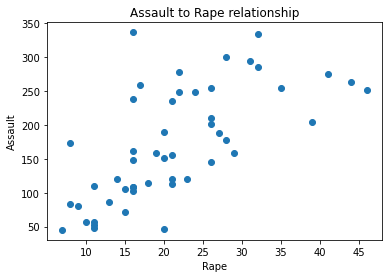

In [57]:
plt.figure(figsize=(6,4))
plt.scatter(df['Rape'],df['Assault'])
plt.title('Assault to Rape relationship')
plt.xlabel('Rape')
plt.ylabel('Assault')
plt.show()

In [36]:
#group by city
grouped=df.groupby(by=['State']).sum()

In [37]:
#cities with crime stats sorted by decending urban population
features_of_interest=pd.DataFrame({'Murder':grouped['Murder'],
                                   'Assault':grouped['Assault'],
                                   'UrbanPop':grouped['UrbanPop'],
                                   'Rape':grouped['Rape']
                                   })

In [39]:
features_of_interest.head(5)

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13,236,58,21
Alaska,10,263,48,44
Arizona,8,294,80,31
Arkansas,9,190,50,20
California,9,276,91,41


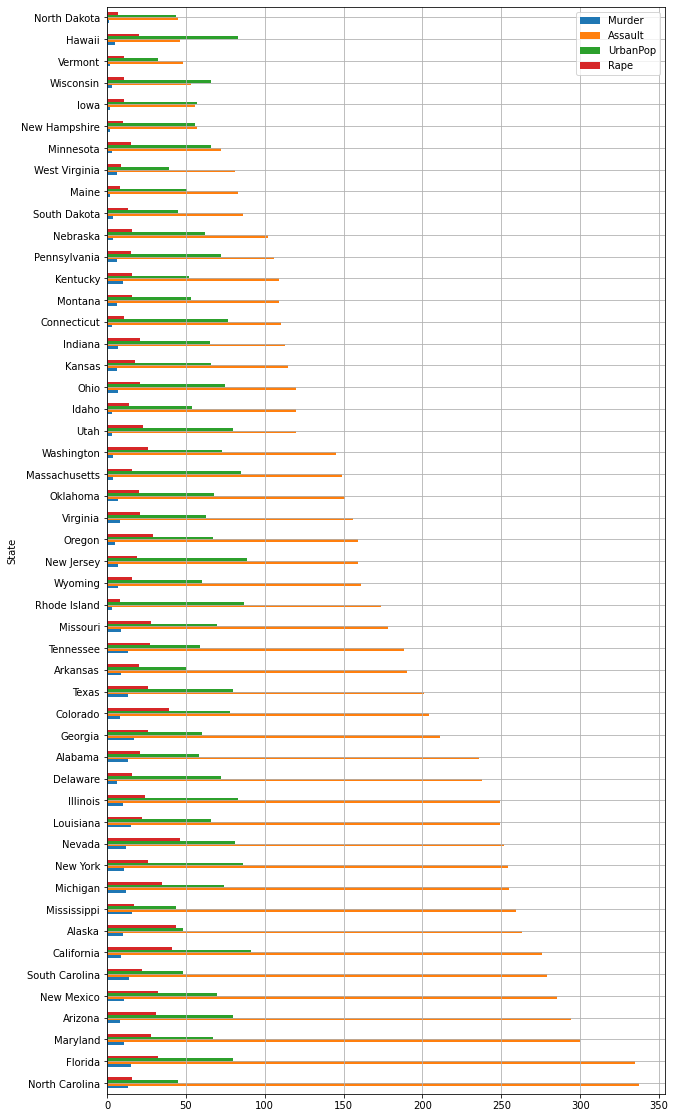

In [52]:
features_of_interest.sort_values(by='Assault',ascending=False).plot.barh(figsize=(10,20),grid=True)
plt.show()

In [59]:
variable_list

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [63]:
#data exploration table
#row values
variable_list=list(df.columns[1:])

#mean value calculation for rows (variables)
mean_list=[]
for n in variable_list:
  mean_=df[n].mean()
  mean_list.append(mean_)


#standard deviation value calc
std_=[]
for n in variable_list:
  stdev_=df[n].std()
  std_.append(stdev_)

#find min value 
min_list=[]
for n in variable_list:
  min_=df[n].min()
  min_list.append(min_)

#find max value
max_list=[]
for n in variable_list:
  max_=df[n].max()
  max_list.append(max_)

#creating dataframe to give the above stats

exploration_table=pd.DataFrame(columns=['Variable','Mean','std_dev','min','max'])
exploration_table['Variable']=variable_list
exploration_table['Mean']=mean_list
exploration_table['std_dev']=std_
exploration_table['min']=min_list
exploration_table['max']=max_list

exploration_table


,Variable,Mean,std_dev,min,max
0,Murder,7.70,4.282141,1,17
1,Assault,170.76,83.337661,45,337
2,UrbanPop,65.54,14.474763,32,91
3,Rape,21.20,9.387356,7,46


In [64]:
#defining and scaling data

X=df[['Murder','Assault','UrbanPop','Rape']].values.reshape(-1,4)
print('Shape of data', X.shape)

X_sc=StandardScaler().fit_transform(X)

Shape of data (50, 4)


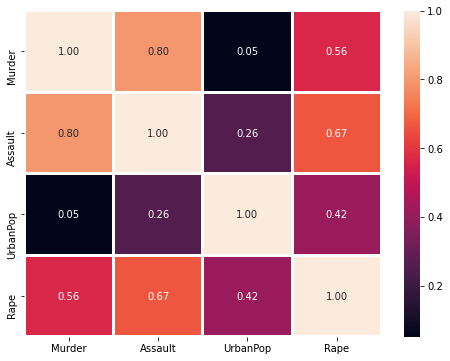

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=2)

In [83]:
#PCA
#no. of comps
n_comps=4
pca=PCA(n_components=n_comps)
#get components
principal_comps=pca.fit_transform(X_sc)
#set index
df=df.set_index(df['State'])
#create dataframe
pca_df=pd.DataFrame(principal_comps,index=df.index)
pca_df.head(5)

,0,1,2,3
State,,,,
Alabama,0.973443,1.137456,-0.447886,0.154435
Alaska,1.944930,1.072333,1.970804,-0.495486
Arizona,1.763090,-0.759802,0.019030,-0.825085
Arkansas,-0.068707,1.137808,0.140946,-0.148449
California,2.560137,-1.551867,0.594716,-0.318694


In [84]:
pca.components_

array([[ 0.53444118,  0.58389131,  0.27506756,  0.5456935 ],
       [ 0.42693612,  0.18041691, -0.86902314, -0.17313022],
       [-0.31956383, -0.29204174, -0.3804376 ,  0.81722568],
       [ 0.65572641, -0.73568492,  0.15621734,  0.06623225]])

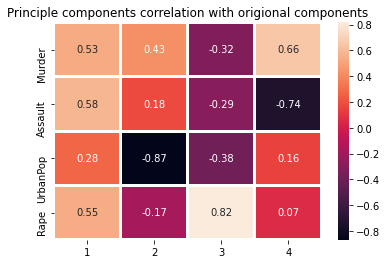

In [85]:
#principle components vs origional components
components=pd.DataFrame(pca.components_,columns=variable_list,index=range(1,n_comps+1)).transpose()
ax=sns.heatmap(components,annot=True,fmt='.2f',linewidth=2)


In [87]:
components

,1,2,3,4
Murder,0.534441,0.426936,-0.319564,0.655726
Assault,0.583891,0.180417,-0.292042,-0.735685
UrbanPop,0.275068,-0.869023,-0.380438,0.156217
Rape,0.545694,-0.173130,0.817226,0.066232


In [86]:
pca_df[[0,1]]

,0,1
State,,
Alabama,0.973443,1.137456
Alaska,1.944930,1.072333
Arizona,1.763090,-0.759802
Arkansas,-0.068707,1.137808
California,2.560137,-1.551867
Colorado,1.557493,-0.984368
Connecticut,-1.401540,-1.111212
Delaware,0.080222,-0.319069
Florida,2.994506,0.016226


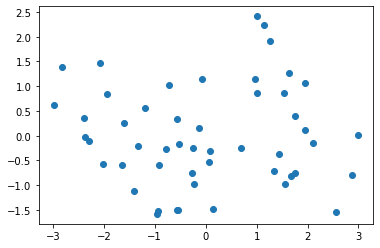

In [88]:
#plot 1st and 2nd pca against each other
X_pca=pca_df[[0,1]]

fig,ax=plt.subplots()
plt.scatter(X_pca[[0]], X_pca[[1]])
plt.show()

[0.61887446002525, 0.8698663169461915, 0.9567074611088463, 1.0]


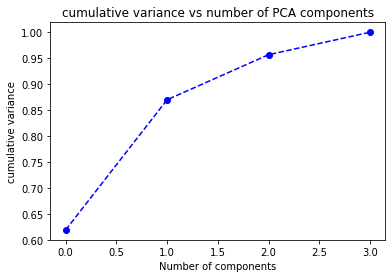

In [89]:
#Cumulative variance explained:
pca_cv=PCA(n_components=4)
pca_cv.fit_transform(X_sc)

#cumulative variance variable
i=0
cumulative_variance_exp=[]
for i in range(0,4):
  if i==0:
    cumulative_variance_exp.append(pca_cv.explained_variance_ratio_[i])
  else:
    cumulative_variance_exp.append(pca_cv.explained_variance_ratio_[i]+cumulative_variance_exp[i-1])

print(cumulative_variance_exp)
plt.plot(cumulative_variance_exp, color='blue',marker='o',
         linestyle='dashed')
plt.xlabel('Number of components')
plt.ylabel('cumulative variance')
plt.title('cumulative variance vs number of PCA components')
plt.show()

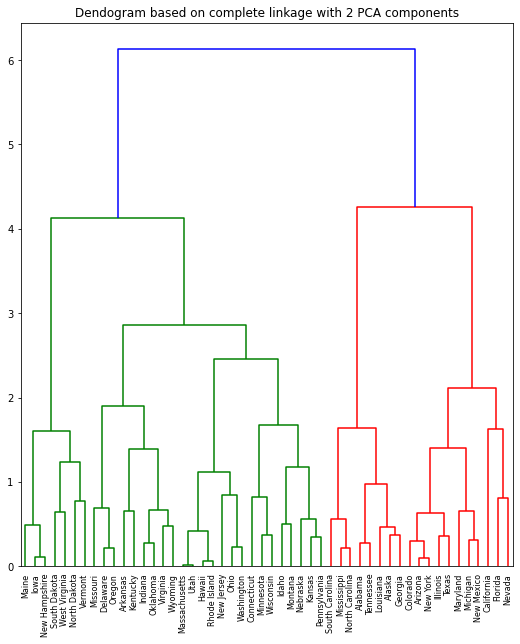

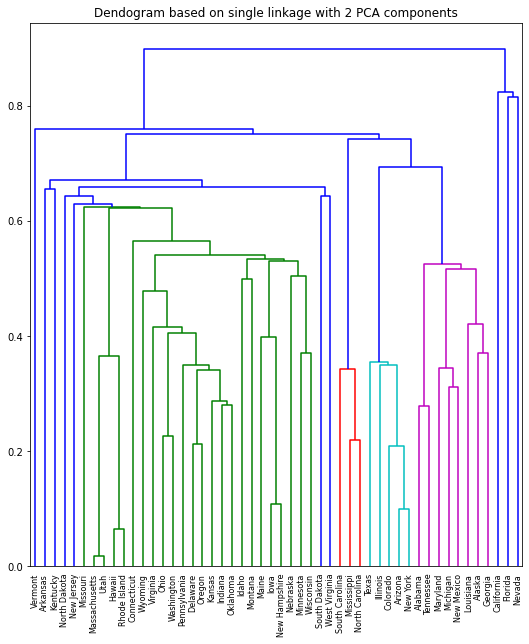

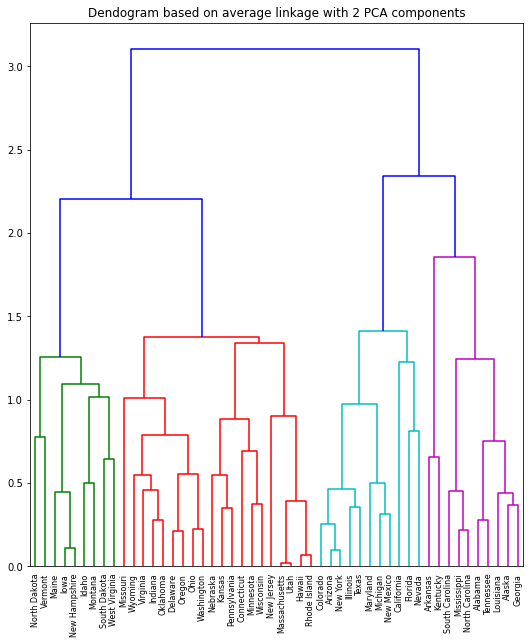

In [93]:
#agglomerative clustering with 2 PCA components
linkage_types=['complete','single','average']

for i,l in enumerate(linkage_types):
  plt.figure(figsize=(30,10))
  plt.subplot(1,3,i+1)
  dend=dendrogram(linkage(X_pca,method=l), labels=df['State'])
  plt.title('Dendogram based on {} linkage with 2 PCA components'.format(l))
  plt.show()

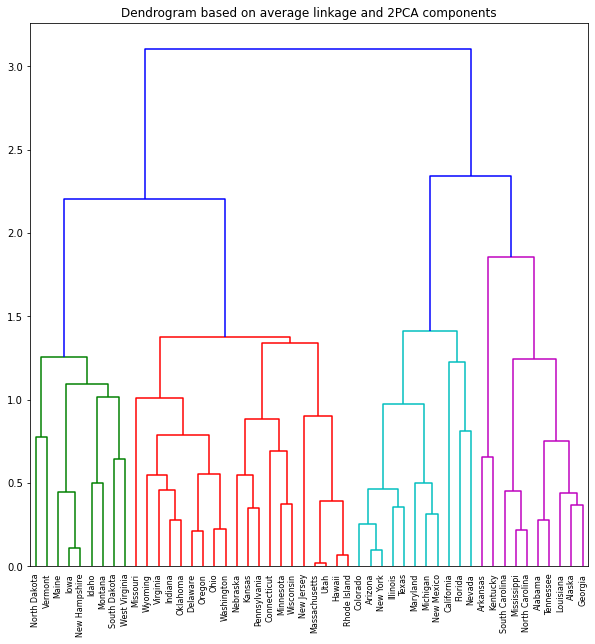

In [94]:
#dendrogram based on average linkage
plt.figure(figsize=(10,10))
dend_avg=dendrogram(linkage(X_pca, method='average'), labels=df['State'])
plt.title('Dendrogram based on average linkage and 2PCA components')
plt.show()

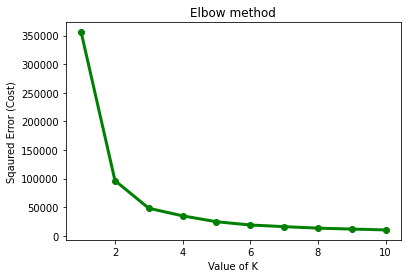

In [95]:
#elbow plot to determine optimal k value
cost=[] 
for i in range(1, 11): 
    KM=KMeans(n_clusters=i, max_iter=500) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color='g', linewidth='3', marker='o') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)")
plt.title('Elbow method')
plt.show() 


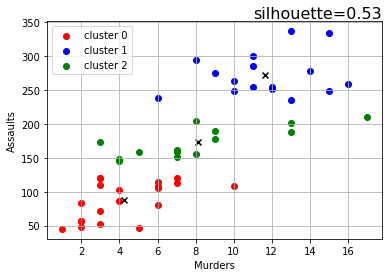

In [96]:
#k-means clustering into 3 clusters
from sklearn.cluster import KMeans

def Kmeans_plot(x, k=3, r=123):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred=kmeans.fit_predict(x)
    colors='rbgcmy'
    for c in range(k):
        plt.scatter(x[y_pred==c,0], x[y_pred==c,1], c=colors[c],
                    label='cluster {}'.format(c))
        plt.scatter(kmeans.cluster_centers_[c,0], kmeans.cluster_centers_[c,1],
                   marker='x', color='black')
        
    score=round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Murders')
    plt.ylabel('Assaults')
    plt.legend()
    plt.grid()
    plt.show()
    
Kmeans_plot(X, k=3, r=0)